In [5]:
%run ./lab1_analysis_functions.py

In [204]:
tenevents = read_ten_event_file()

M = find_M_value(tenevents)
print('M ', M)

M  4445.91181058


In [205]:
tenevents = read_ten_event_file()
ndata = len(tenevents)
nsamples = 4096
x_values = np.linspace(0, nsamples, nsamples)
tenevents = fast_baseline_correction(tenevents)
plt.figure()
plt.cla()
plt.clf()
for event in tenevents[0:5]:
    plt.plot(event)
plt.xlim([950, 1020])
plt.title('Raw Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('../figures/tenevents_rawdata.pdf')
# plt.show()

In [206]:
k = 100 # 1 us
m = 100 # 1 us

plt.figure()
plt.cla()
plt.clf()
for event in tenevents[0:5]:
    event = fast_trapezoidal_filter(event, k, m, M=4400)
    plt.plot(x_values, event)
plt.xlim([950, 1325])
plt.title('Filtered Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('../figures/tenevents_filtered.pdf')
# plt.show()

In [6]:
co_nrgs = read_nrg_sample_file('../data/co_energies.txt')
cs_nrgs = read_nrg_sample_file('../data/cs_energies.txt')
am_nrgs = read_nrg_sample_file('../data/am_energies.txt')

In [3]:
m = 55
k = 1164
M = 5920.56

In [4]:
# Final Filter Paramters
print("========  Final Filter Parameters  ========")
print(' gap time (m)     = ' + str(m * 10) + ' ns')
print(' peaking time (k) = ' + str(k * 10) + ' ns')
print(' decay time (M)   = ' + str(round(M / 10,2)) + ' ns')
print("===========================================")

save_parameters(m * 10 , k * 10 , M / 10)

========  Final Filter Parameters  ========
 gap time (m)     = 550 ns
 peaking time (k) = 11640 ns
 decay time (M)   = 592.06 ns


IOError: [Errno 2] No such file or directory: './figures/gap.dat'

In [7]:
# GET ENERGY RESOLUTION FOR DIFFERENT PEAKS

fwhm_peak_values = []
fwhm_peak_energies = []
fwhm_pulser_values = []
peak_err = []
pulser_err = []

# AM-241
am_counts, bin_edges = np.histogram(am_nrgs, bins=2048, range=[0, 400])
am_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
am_bins = am_bins[10:250] 
am_counts = am_counts[10:250]
peak_fwhm, peak_center ,err = fit_gaussian_peak_linear_background(am_bins, am_counts)
fwhm_peak_values.append(round(peak_fwhm / peak_center, 7) * 100)
fwhm_peak_energies.append(59.536)
peak_err.append(err * 100 / peak_center)

# AM-PULSER
am_counts, bin_edges = np.histogram(am_nrgs, bins=2048, range=[0, 400])
am_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
am_bins = am_bins[1000:2000] 
am_counts = am_counts[1000:2000]
pulser_fwhm, pulser_center ,err = fit_gaussian_peak_linear_background(am_bins, am_counts)
fwhm_pulser_values.append(round(pulser_fwhm / pulser_center, 7) * 100)
pulser_err.append(err* 100 / pulser_center)

# CS-662
cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[0, 512])
cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
cs_bins = cs_bins[1000:2000]
cs_counts = cs_counts[1000:2000]
cs_peak_fwhm, cs_peak_center, err = fit_gaussian_peak_linear_background(cs_bins, cs_counts)

fwhm_peak_values.append(round(cs_peak_fwhm / cs_peak_center, 7) * 100)
fwhm_peak_energies.append(661.615)
peak_err.append(err* 100 / cs_peak_center)

# CS-PULSER
cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[900, 900+512])
cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
cs_bins = cs_bins[100:1000]
cs_counts = cs_counts[100:1000]
cs_pulser_fwhm, cs_pulser_center, err = fit_gaussian_peak_linear_background(cs_bins, cs_counts)
fwhm_pulser_values.append(round(cs_pulser_fwhm / cs_pulser_center, 7) * 100)
pulser_err.append(err * 100 / cs_pulser_center)

# CO-1173
co_counts, bin_edges = np.histogram(co_nrgs, bins=2048, range=[0, 1024])
co_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
peak_1_fwhm, peak_1_center, err = fit_gaussian_peak_linear_background(co_bins[1200:1450], co_counts[1200:1450])
fwhm_peak_values.append(round(peak_1_fwhm / peak_1_center, 7) * 100)
fwhm_peak_energies.append(1173.231)
peak_err.append(err * 100 / peak_1_center)

# CO-1332
co_counts, bin_edges = np.histogram(co_nrgs, bins=2048, range=[0, 1024])
co_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
co_bins = co_bins[1400:1600]
co_counts = co_counts[1400:1600]
peak_2_fwhm, peak_2_center,err = fit_gaussian_peak_linear_background(co_bins, co_counts)
fwhm_peak_values.append(round(peak_2_fwhm / peak_2_center, 7) * 100)
fwhm_peak_energies.append(1332.508)
peak_err.append(err * 100/ peak_2_center)

# CO-PULSER
co_counts, bin_edges = np.histogram(co_nrgs, bins=2048, range=[512, 1024])
co_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
co_bins = co_bins[1800:] 
co_counts = co_counts[1800:]
pulser_fwhm, pulser_center,err = fit_gaussian_peak_linear_background(co_bins, co_counts)
fwhm_pulser_values.append(round(pulser_fwhm / pulser_center, 7) * 100)
pulser_err.append(err * 100/ pulser_center)

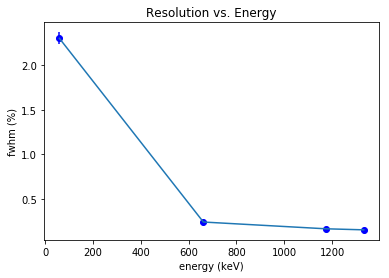

In [8]:
plt.figure(2)
plt.plot(fwhm_peak_energies, fwhm_peak_values, 'ob')
plt.errorbar(fwhm_peak_energies, fwhm_peak_values, yerr=peak_err, ecolor='b')
plt.title('Resolution vs. Energy')
plt.ylabel('fwhm (%)')
plt.xlabel('energy (keV)')
plt.savefig('../figures/fwhm_vs_energy.pdf')
plt.show()

In [15]:
# find fano factor

fano_list = []
print(fwhm_pulser_values[1:])
fwhm_elec = np.mean(fwhm_pulser_values) # Am-241 pulser value is very differnet. Shouldn't depend on energy. Ignore for now.
for i in range(0, len(fwhm_peak_energies), 1):
    e = fwhm_peak_energies[i]
    fwhm =(fwhm_peak_values[i] / 100) # was a percent
    fwhm = fwhm - (fwhm_elec / 100)
    fwhm = fwhm * fwhm_peak_energies[i] #fwhm in kev
    fano =fwhm * (1/2.35) * np.sqrt(1/(e*(2.9*10**(-3)))) 
    fano = fano**2
    fano = round(fano, 3)
    fano_list.append(fano)
    
fano = round(np.mean(fano_list[1:]),3)
print('average fano factor: ' + str( fano))
print('list of fano factors: ' + str(fano_list[1:]))

[0.05987, 0.059210000000000006]
average fano factor: 0.035
list of fano factors: [0.07, 0.021, 0.015]


In [216]:
print('ANALYSIS COMPLETE')

ANALYSIS COMPLETE
